In [13]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
dataset_path = os.getcwd()
dataset_path += "\\A_Z Handwritten Data.csv"
dataset_path_path = os.path.abspath(dataset_path)

df = pd.read_csv(dataset_path)

In [7]:
class_column = df['0']
class_column_letters = class_column.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
del df['0']

### DATA VISUALIZATION

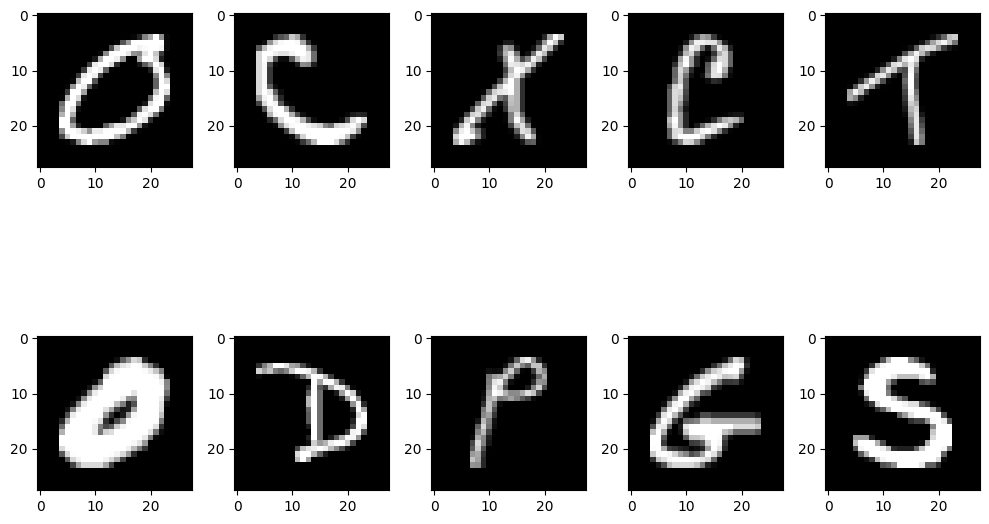

In [8]:
X_data = np.array(df.sample(10))
X_data = X_data.reshape(-1,28,28,1)

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

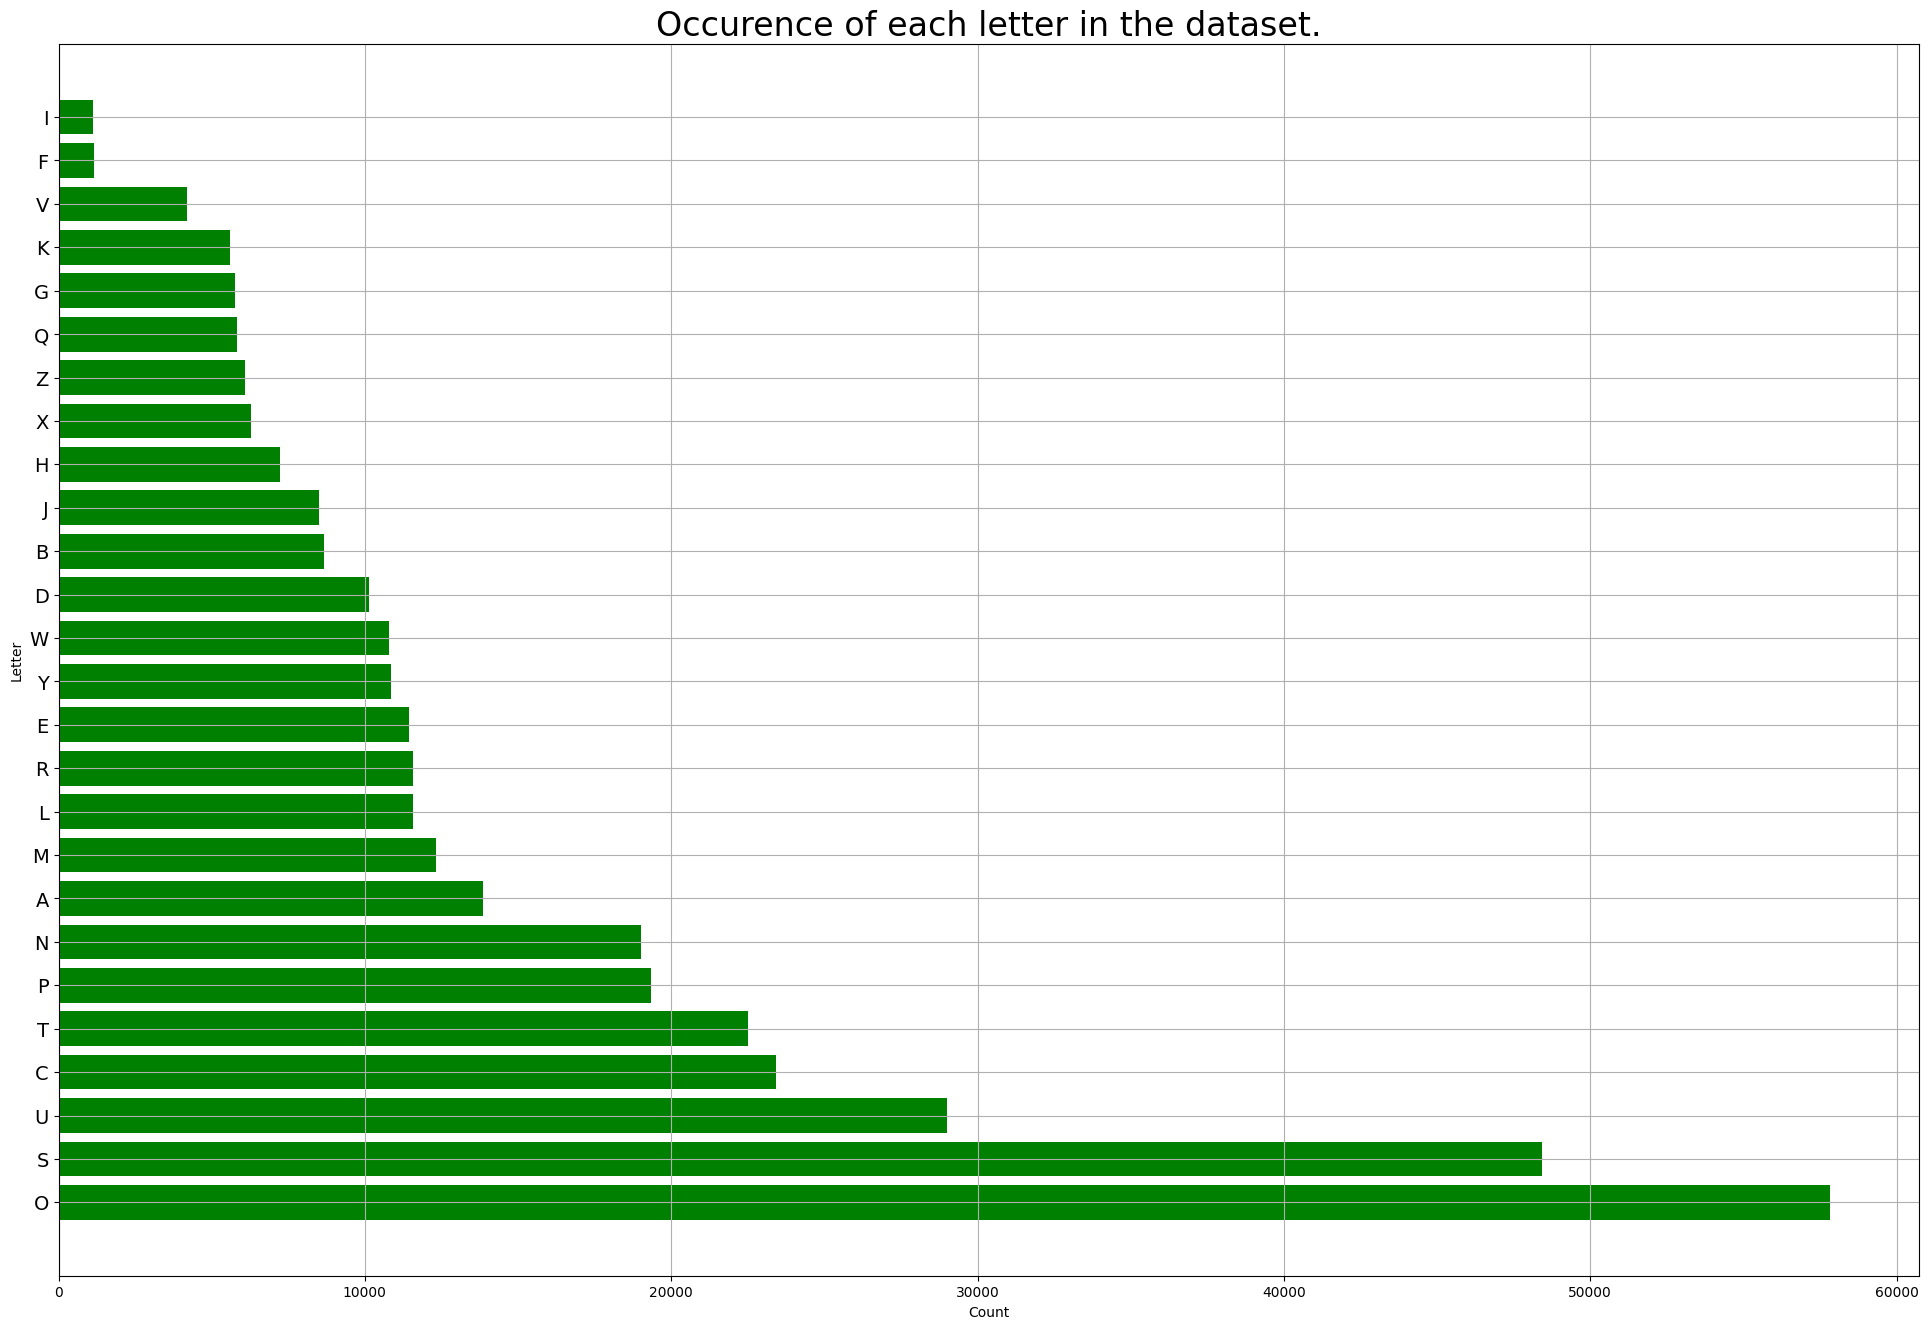

In [9]:
alphabet = ['O', 'S', 'U', 'C' , 'T' , 'P' , 'N', 'A', 'M', 'L', 'R', 'E', 'Y', 'W', 'D', 'B', 'J', 'H', 'X', 'Z', 'Q', 'G', 'K', 'V', 'F', 'I']
counts = class_column_letters.value_counts()

fig, ax = plt.subplots(1, 1, figsize=(24, 16))
ax.barh(alphabet, counts, color='green',)

plt.xlabel('Count')
plt.ylabel('Letter')
plt.yticks(fontsize=14)
plt.title('Occurence of each letter in the dataset.', fontsize=24)
plt.grid()
plt.show()

In [11]:
X = df.values
y = class_column.values

# Reshape the features to 2D images
X = X.reshape(-1, 28, 28, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

### CREATING FIRST MODEL

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
1892/1892 [==============================] - 118s 60ms/step - loss: 0.2924 - accuracy: 0.9325 - val_loss: 0.0898 - val_accuracy: 0.9748
Epoch 2/10
1892/1892 [==============================] - 116s 61ms/step - loss: 0.0742 - accuracy: 0.9786 - val_loss: 0.0685 - val_accuracy: 0.9816
Epoch 3/10
1892/1892 [==============================] - 113s 60ms/step - loss: 0.0574 - accuracy: 0.9834 - val_loss: 0.0746 - val_accuracy: 0.9787
Epoch 4/10
1892/1892 [==============================] - 101s 54ms/step - loss: 0.0480 - accuracy: 0.9859 - val_loss: 0.0576 - val_accuracy: 0.9840
Epoch 5/10
1892/1892 [==============================] - 110s 58ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 6/10
1892/1892 [==============================] - 106s 56ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0538 - val_accuracy: 0.9866
Epoch 7/10
1892/1892 [==============================] - 110s 58ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0

In [17]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4074/4074 [==============================] - 23s 5ms/step - loss: 0.0501 - accuracy: 0.9895
Test Loss: 0.0501
Test Accuracy: 0.9895


### CREATING SECOND MODEL

In [20]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(26, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model2.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
1892/1892 [==============================] - 107s 55ms/step - loss: 0.3900 - accuracy: 0.8911 - val_loss: 0.1490 - val_accuracy: 0.9569
Epoch 2/5
1892/1892 [==============================] - 98s 52ms/step - loss: 0.1238 - accuracy: 0.9640 - val_loss: 0.1349 - val_accuracy: 0.9621
Epoch 3/5
1892/1892 [==============================] - 88s 47ms/step - loss: 0.0971 - accuracy: 0.9720 - val_loss: 0.1064 - val_accuracy: 0.9693
Epoch 4/5
1892/1892 [==============================] - 91s 48ms/step - loss: 0.0825 - accuracy: 0.9757 - val_loss: 0.0912 - val_accuracy: 0.9738
Epoch 5/5
1892/1892 [==============================] - 88s 46ms/step - loss: 0.0716 - accuracy: 0.9788 - val_loss: 0.0762 - val_accuracy: 0.9790


In [22]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4074/4074 [==============================] - 20s 4ms/step - loss: 0.0762 - accuracy: 0.9790
Test Loss: 0.0762
Test Accuracy: 0.9790
